In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/rogerloh-acc/Fun-Projects/main/Demo/Profitability%20by%20Category/Kedai%20Harimau%20-%20Source.csv")
df

,ID,Item,Category,Revenue,COGS
0,1,Apple,Fruits,478,420.64
1,2,Asparagus,Fruits,165,145.53
2,3,Bacon,Meat,65,47.19
3,4,Bananas,Fruits,85,72.93
4,5,"Beef, Bonless Stew",Meat,421,331.75
...,...,...,...,...,...
94,95,Watermelon,Fruits,191,189.09
95,96,Wipes,Cleaning,425,385.90
96,97,Yellow Mustard,Dry/Canned Goods,259,242.94
97,98,Yogurt,Refrigerated Items,44,37.40


In [3]:
df.describe()

,ID,Revenue,COGS
count,99.000000,99.000000,99.000000
mean,50.000000,267.070707,213.967879
std,28.722813,135.374632,117.085464
min,1.000000,41.000000,32.470000
25%,25.500000,150.000000,119.985000
50%,50.000000,250.000000,200.690000
75%,74.500000,383.000000,297.350000
max,99.000000,500.000000,475.090000


In [4]:
df.drop(["ID"], axis = 1, inplace = True)
df

,Item,Category,Revenue,COGS
0,Apple,Fruits,478,420.64
1,Asparagus,Fruits,165,145.53
2,Bacon,Meat,65,47.19
3,Bananas,Fruits,85,72.93
4,"Beef, Bonless Stew",Meat,421,331.75
...,...,...,...,...
94,Watermelon,Fruits,191,189.09
95,Wipes,Cleaning,425,385.90
96,Yellow Mustard,Dry/Canned Goods,259,242.94
97,Yogurt,Refrigerated Items,44,37.40


In [5]:
df = df.groupby ("Category").sum()
df

,Revenue,COGS
Category,,
Cleaning,1609,1401.23
Dry/Canned Goods,6890,5372.86
Frozen Food,1047,879.90
Fruits,6663,5394.89
Meat,7731,6208.87
Refrigerated Items,2500,1925.07


In [6]:
df["Profit"] = df["Revenue"] - df["COGS"]
df

,Revenue,COGS,Profit
Category,,,
Cleaning,1609,1401.23,207.77
Dry/Canned Goods,6890,5372.86,1517.14
Frozen Food,1047,879.90,167.10
Fruits,6663,5394.89,1268.11
Meat,7731,6208.87,1522.13
Refrigerated Items,2500,1925.07,574.93


In [7]:
df.sort_values ("Profit", ascending = False, inplace = True)

In [8]:
df["Profit %"] = df["Profit"] / df["Profit"].sum() * 100
df

,Revenue,COGS,Profit,Profit %
Category,,,,
Meat,7731,6208.87,1522.13,28.953355
Dry/Canned Goods,6890,5372.86,1517.14,28.858437
Fruits,6663,5394.89,1268.11,24.121487
Refrigerated Items,2500,1925.07,574.93,10.936091
Cleaning,1609,1401.23,207.77,3.952119
Frozen Food,1047,879.90,167.10,3.178510


In [9]:
df ["Cum Profit %"] = df["Profit %"].cumsum()
df

,Revenue,COGS,Profit,Profit %,Cum Profit %
Category,,,,,
Meat,7731,6208.87,1522.13,28.953355,28.953355
Dry/Canned Goods,6890,5372.86,1517.14,28.858437,57.811793
Fruits,6663,5394.89,1268.11,24.121487,81.933280
Refrigerated Items,2500,1925.07,574.93,10.936091,92.869371
Cleaning,1609,1401.23,207.77,3.952119,96.821490
Frozen Food,1047,879.90,167.10,3.178510,100.000000


In [10]:
import matplotlib.pyplot as plt

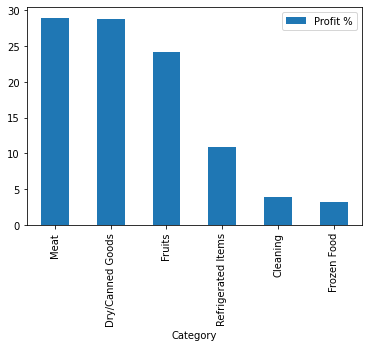

C:\Users\roger\AppData\Local\Temp/ipykernel_10672/1131409450.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "Transparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig("C:\\Users\\roger\\Downloads\\chart.png", Transparent = True)


In [11]:
ax = df[["Profit %"]].plot (kind = "bar")

fig1 = plt.gcf()
plt.show()
fig1.savefig("C:\\Users\\roger\\Downloads\\chart.png", Transparent = True)

In [12]:
# import xlsxwriter

In [13]:
writer = pd.ExcelWriter ("C:\\Users\\roger\\Downloads\\MiniMart Analysis.xlsx", engine = "xlsxwriter")
df.to_excel (writer, sheet_name = "Data Analysis", index = False)

worksheet = writer.sheets["Data Analysis"]
worksheet.insert_image("G1","C:\\Users\\roger\\Downloads\\chart.png")
worksheet.hide_gridlines(2)

writer.save()